In [27]:
%%html
<style>
.cell.selected~.unselected { display: none; }
.cell.code_cell.unselected .input { display: none; }
</style>

## Bar chart


In [28]:
%load_ext autoreload
%autoreload
%run ./prepare_data.ipynb
%run ./analysis.ipynb
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
    Current URL         Guess  votes
0   T5tGEv9cegY          Фуад      6
1   nszMBbCZKo4  Ali Huseynov      6
2   H9Z3_ifFheQ       Kamusik      6
3   yawlrsRDabA          Фуад      6
4   AxLH0lXEGAY         Girey      4
5   T8b2p9NWjdM         Aslan      4
6   9pBmkOB1P8U         Aslan      4
7   J3eeh15GXj0       Alesker      4
8   GipD4SbJaD0          Zaur      4
9   90cyDLcU-3g       Kamusik      4
10  T8b2p9NWjdM          Zaur      3
11  J3eeh15GXj0          Emin      3
12  GipD4SbJaD0          Emin      3
13  6ybd5rbQ5rU         Aslan      3
14  yawlrsRDabA         Girey      3
15  6ybd5rbQ5rU       Alesker      3
16  9pBmkOB1P8U       Alesker      3
17  6ybd5rbQ5rU          Emin      3
18  nszMBbCZKo4          Фуад      2
19  90cyDLcU-3g         Ирада      2
20  GipD4SbJaD0  Ali Huseynov      2
21  J3eeh1

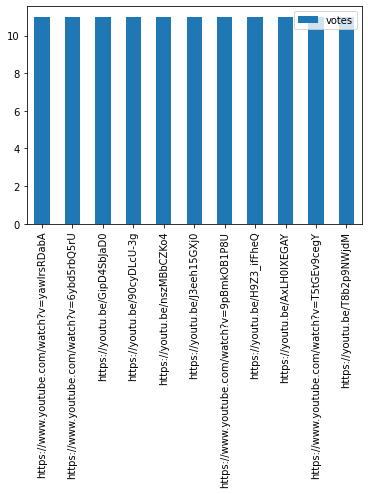

In [29]:
votes_links.plot.bar(y='votes'); # plot histogram


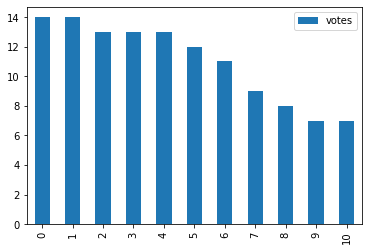

In [30]:
total_votes.plot.bar(y='votes'); # plot histogram
#plt.savefig('data/total_votes.pdf', bbox_inches='tight')

In [31]:
if len(df_raw) < 30:
    guess_stats.plot.bar(x='Current URL'); # plot histogram


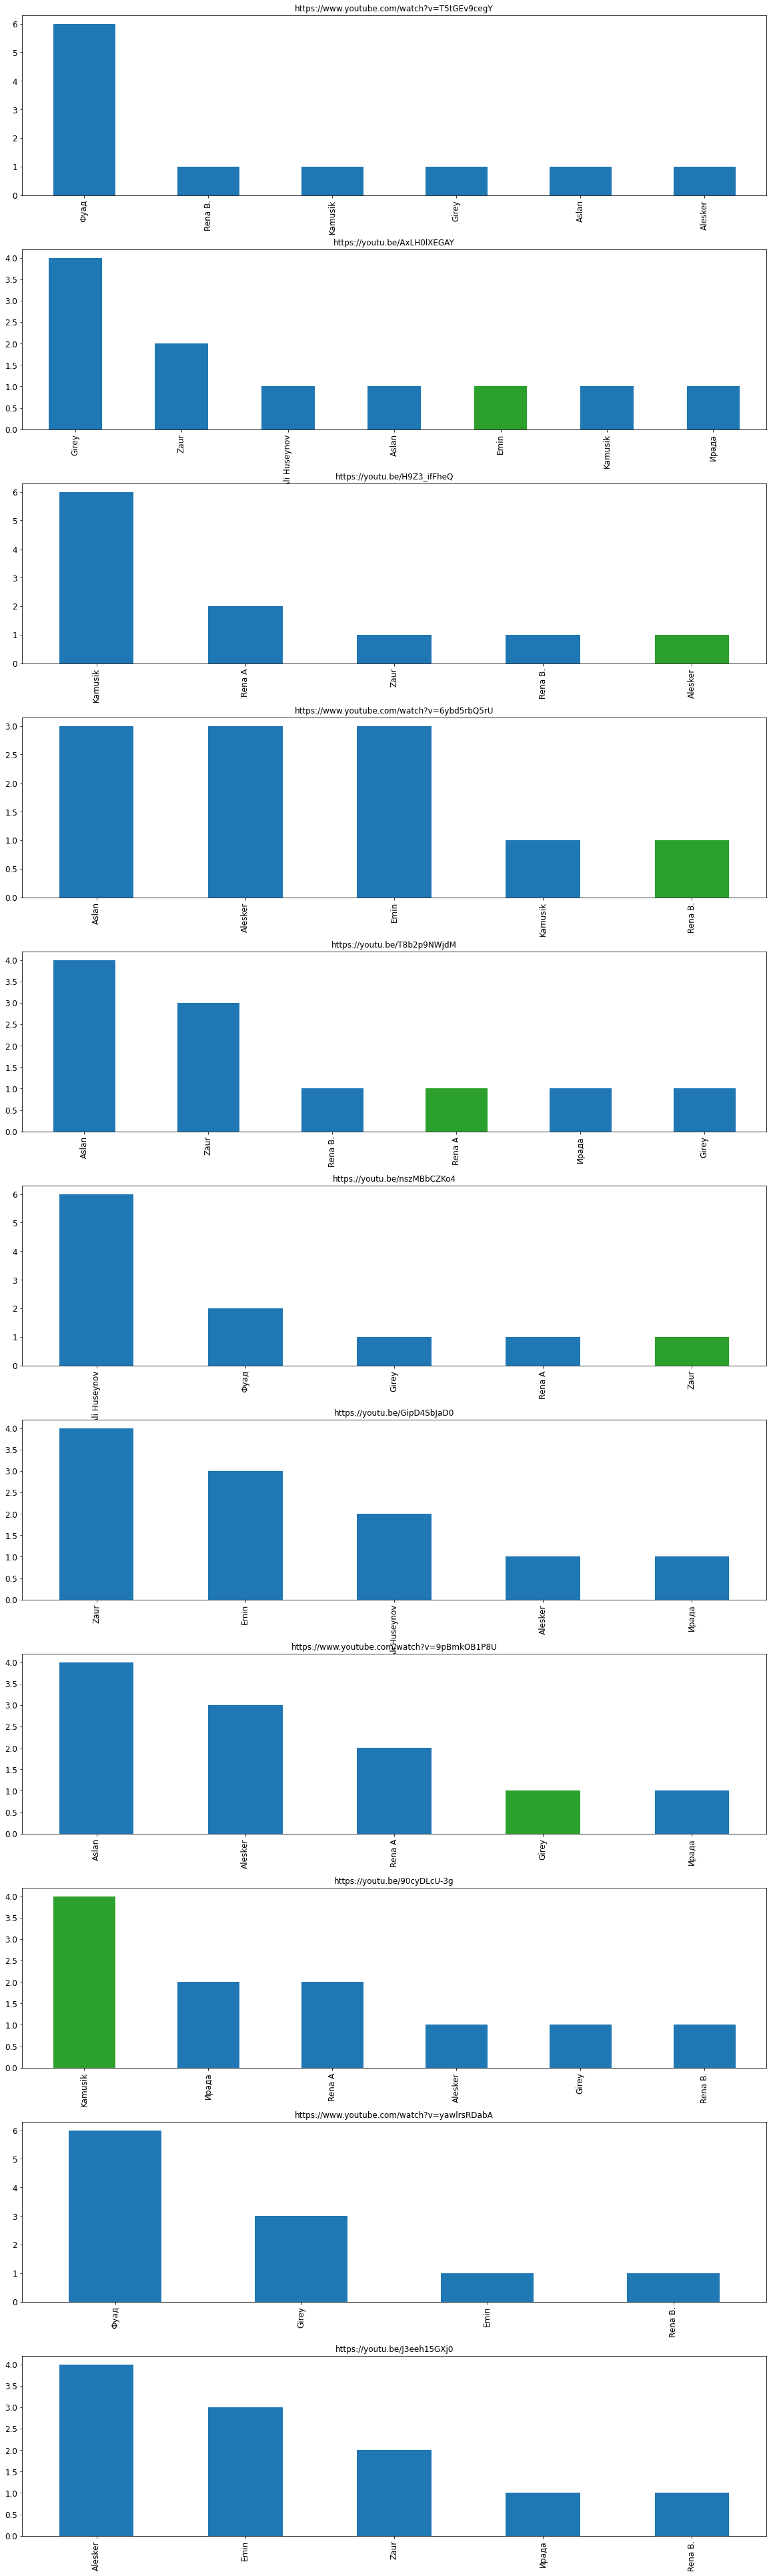

In [32]:
# bar chart per URL, the correct answer is colored in green, the rest of the guesses are blue

fig, axes = plt.subplots(len(urls),1,figsize=(20, 60))
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1)
for i,ax in enumerate(axes):
    url = urls[i]
    temp_df = df_guess.loc[df_guess['Current URL'] == url]
    labels = temp_df['Guess']
    cor_ans = df2_raw[df2_raw['URL'] == url]['Player'].values[0]
    ind=labels.isin([cor_ans])
    color=list(map(lambda x: 'C2' if x else 'C0', ind))
    #color=list(map(lambda x: 'C0' if x else 'C0', ind))
    width = len(ind) * [0.2]
    temp_df.loc[:,['Guess','votes']].plot.bar(ax=ax,subplots=True, x='Guess',y='votes',color=color, fontsize=12);
    ax.get_legend().remove()
    ax.set_title(url,fontdict={'fontsize':12})
    ax.set(xlabel=None)

plt.savefig('../data/charts/bar-chart.pdf', bbox_inches='tight')
#plt.show()




## Pie chart

In [33]:
# combined pie chart, only for small dataframes
if len(df_raw) < 30:
    guess_stats.plot.pie(subplots=True,y='votes',figsize=(6, 6),autopct='%1.1f%%',shadow = True);



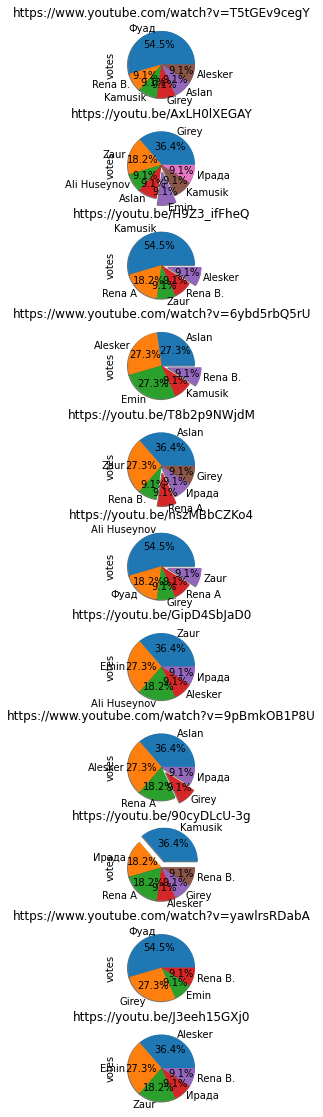

In [34]:
# pie chart per URL, the correct answers are "exploded"

fig, axes = plt.subplots(len(urls),1,figsize=(30, 20))
for i,ax in enumerate(axes):
    url = urls[i]
    temp_df = df_guess.loc[df_guess['Current URL'] == url]
    labels = temp_df['Guess']
    cor_ans = df2_raw[df2_raw['URL'] == url]['Player'].values[0]
    ind=labels.isin([cor_ans])
    #explode=list(map(int, ind))
    explode=list(map(lambda x: 0.2 if x else 0, ind)) #only explode correct guess
    temp_df.loc[:,['Guess','votes']].plot.pie(ax=ax,subplots=True,labels = labels, y='votes', autopct='%1.1f%%',shadow = True,explode=explode);
    ax.get_legend().remove()
    ax.set_title(url)
plt.show()

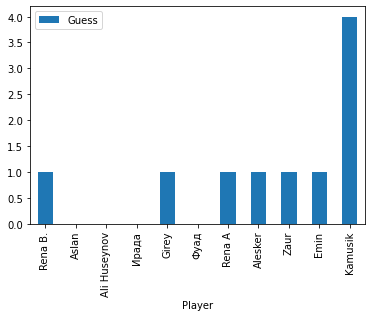

In [35]:
corr_player_stats.sort_values('Guess')
fig = corr_player_stats.plot.bar(y='Guess',x='Player').get_figure()
fig.savefig('../data/charts/correct_guess_stats.png', bbox_inches='tight')

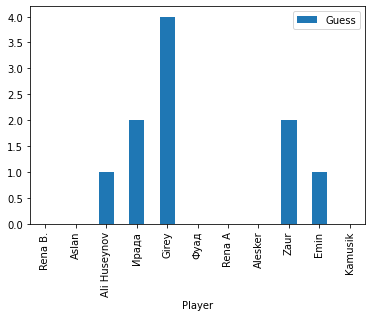

In [36]:
corr_guess_stats.sort_values('Guess')
fig = corr_guess_stats.plot.bar(y='Guess',x='Player').get_figure()
fig.savefig('../data/charts/correct_player_stats.png', bbox_inches='tight')

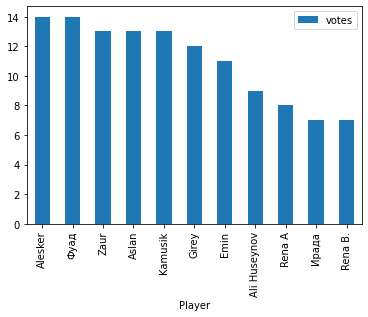

In [37]:
# total votes for player
#total_votes.sort_values
fig = total_votes.plot.bar(y='votes',x='Player').get_figure()
fig.savefig('../data/charts/guessed_player_stats.png', bbox_inches='tight')

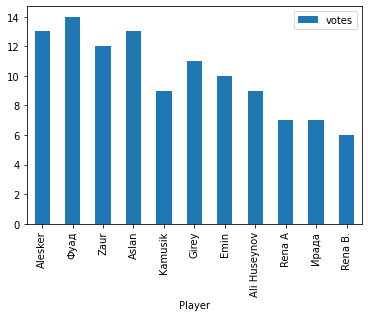

In [38]:
# wrongs votes for player
fig = wrong_votes.plot.bar(y='votes',x='Player').get_figure()
fig.savefig('../data/charts/wrong_guesses_stats.png', bbox_inches='tight')



